In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [7]:
def createSamples(array, sample_size, sample_count):
    samples = []
    for i in range(sample_count):
        sample = np.random.choice(array,size = sample_size)
        samples.append(sample)
    return samples

In [8]:
def calculateMeans(arraySet):
    sample_mean = {}
    sample_idx_map = {}
    mean_list = []
    for i,sample in enumerate(arraySet): 
        mean_list.append(float(np.mean(sample)))
        sample_mean[i] = float(np.mean(sample))
        sample_idx_map[i] = sample

    return sample_mean, sample_idx_map, mean_list 


In [18]:
def plotNormalCurve(sample,bincount): 
    mean = np.mean(sample)
    std = np.std(sample)
    count, binsSamples, ignored = plt.hist(sample, bincount, density=True)

    plt.plot(binsSamples, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp(-1 * (binsSamples - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')


#### Defining Populution


In [ ]:
population = np.random.normal(0,size= 250)

size = len(population)
meu = float(np.mean(population))
#variance = (float((sum(population - meu)**2)/size)**(1/2)) #The square root is in the wrong side, thats why initially it did not work
sigma = np.std(population)

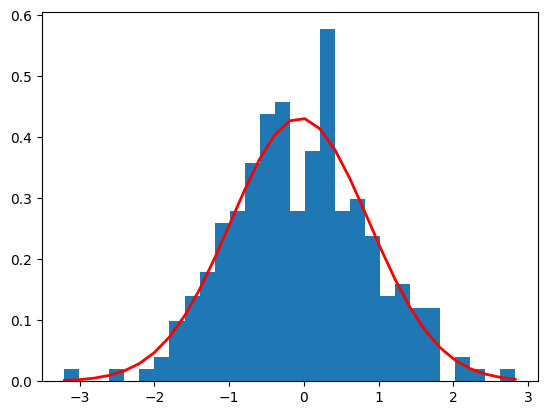

In [5]:
count, bins, ignored = plt.hist(population, 30,density=True) ##Density Graph
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp(-1 * (bins - meu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

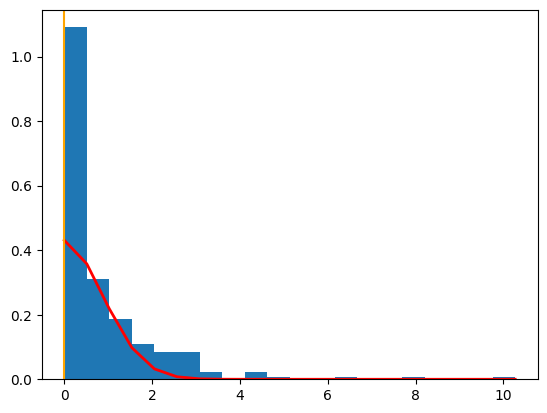

In [21]:
#For expected value of variations. i.e : E{VAR(X)} = E{X^2} - E{X}^2
count, bins, ignored = plt.hist(population**2, 20,density=True) ##Density Graph
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp(-1 * (bins - meu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.axvline(x = meu**2, color= "orange")

#### Creating Samples from Population

In [34]:
samples = createSamples(population,15, 250)

In [35]:
sampleParametersDict, sampleHashMap, meanList = calculateMeans(samples)

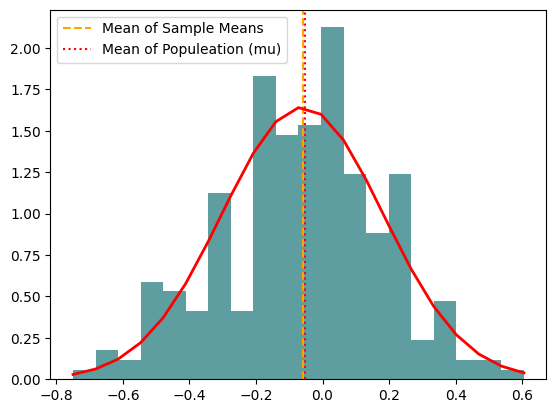

In [42]:
count, binsSamples, ignored = plt.hist(meanList, 20, density=True, color="cadetblue")
plt.axvline(x = np.mean(meanList), color= "orange", linestyle="--", label='Mean of Sample Means (n=10)')
plt.axvline(x = meu, linestyle = ":", color = "red")

meanSampleMeans = np.mean(meanList) 
sigmaSampleMeans = np.std(meanList)
plt.plot(binsSamples, 1/(sigmaSampleMeans * np.sqrt(2 * np.pi)) *
               np.exp(-1 * (binsSamples - meanSampleMeans)**2 / (2 * sigmaSampleMeans**2) ),
         linewidth=2, color='r')
plt.legend(['Mean of Sample Means','Mean of Populeation (mu)'])

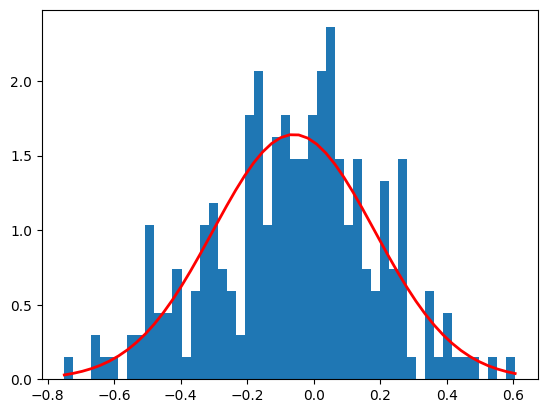

In [40]:
plotNormalCurve(meanList, 50)

#### Sigma Distribution 💀☠️😎

In [94]:
## Different Types of Variation Calculations 
sampleSigmaBiased = []
for i in iter(sampleHashMap): 
    sample = sampleHashMap[i]
    smean = np.mean(sample)
    n = len(sample)
    sigma = float(sum((sample - smean)**2)**(1/2))*1/n
    sampleSigmaBiased.append(sigma)

sampleSigmaUnbiased = []
for i in iter(sampleHashMap): 
    sample = sampleHashMap[i]
    smean = np.mean(sample)
    n = len(sample)
    sigma = float(sum((sample - smean)**2)**(1/2))*(1/(n-1))
    sampleSigmaUnbiased.append(sigma)


Text(0.24650924827331872, 5, 'Population Sigma: 0.2465')

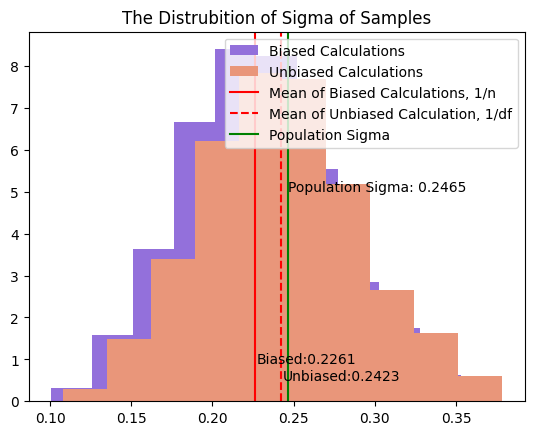

In [96]:
plt.hist(sampleSigmaBiased, density=True, color="mediumpurple",label="Biased")
plt.hist(sampleSigmaUnbiased, density = True, color="darksalmon",label="Unbiased")
plt.title("The Distrubition of Sigma of Samples")
plt.legend(['Biased Calculation, 1/n', 'Unbiased Calculation, 1/df'])
plt.axvline(x = np.mean(sampleSigmaBiased), color = "red", )
plt.axvline(x = np.mean(sampleSigmaUnbiased),color = "red", linestyle= "--")
plt.axvline(x = sigma, color = "green", linestyle= "-")
plt.legend(['Biased Calculations','Unbiased Calculations','Mean of Biased Calculations, 1/n', 'Mean of Unbiased Calculation, 1/df', 'Population Sigma'])
plt.text(x = np.mean(sampleSigmaBiased)+0.001, y= 0.9, s = f"Biased:{float(np.mean(sampleSigmaBiased)):.4f}")
plt.text(x = np.mean(sampleSigmaUnbiased)+0.001, y= 0.5, s = f"Unbiased:{float(np.mean(sampleSigmaUnbiased)):.4f}")
plt.text(x = sigma, y = 5, s = f"Population Sigma: {sigma:.4f}") 


#### Variation Distribution 👌😊😉

In [78]:
## Different Types of Variation Calculations 
sampleSigmaBiased = []
for i in iter(sampleHashMap): 
    sample = sampleHashMap[i]
    smean = np.mean(sample)
    n = len(sample)
    sigma = float(sum((sample - smean)**2)**(1/2))*1/n
    sampleSigmaBiased.append(sigma**2)

sampleSigmaUnbiased = []
for i in iter(sampleHashMap): 
    sample = sampleHashMap[i]
    smean = np.mean(sample)
    n = len(sample)
    sigma = float(sum((sample - smean)**2)**(1/2))*(1/(n-1))
    sampleSigmaUnbiased.append(sigma**2)

Text(0.060766809484276686, 5, 'Population Var: -0.0532')

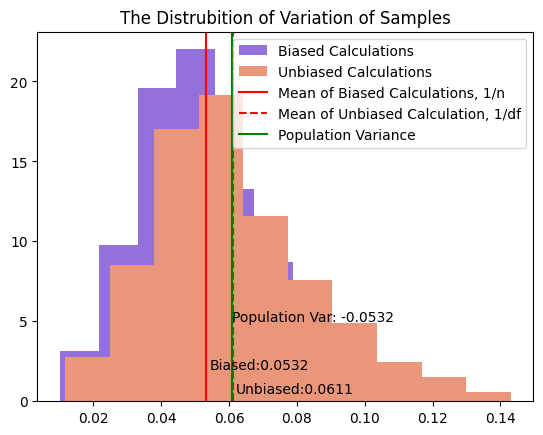

In [91]:
plt.hist(sampleSigmaBiased, density=True, color="mediumpurple",label="Biased")
plt.hist(sampleSigmaUnbiased, density = True, color="darksalmon",label="Unbiased")
plt.title("The Distrubition of Variation of Samples")
plt.legend(['Biased Calculation, 1/n', 'Unbiased Calculation, 1/df'])
plt.axvline(x = np.mean(sampleSigmaBiased), color = "red", )
plt.axvline(x = np.mean(sampleSigmaUnbiased),color = "red", linestyle= "--")
plt.axvline(x = sigma**2, color = "green", linestyle= "-")
plt.legend(['Biased Calculations','Unbiased Calculations','Mean of Biased Calculations, 1/n', 'Mean of Unbiased Calculation, 1/df', 'Population Variance'])
plt.text(x = np.mean(sampleSigmaBiased)+0.001, y= 2, s = f"Biased:{float(np.mean(sampleSigmaBiased)):.4f}")
plt.text(x = np.mean(sampleSigmaUnbiased)+0.001, y= 0.5, s = f"Unbiased:{float(np.mean(sampleSigmaUnbiased)):.4f}")
plt.text(x = sigma**2, y = 5, s = f"Population Var: {meu:.4f}") 
